# Se resuelve una ecuación diferencial con la equivalencia de la Integral de Volterra

Sea la ecuación diferencial $^{C}_{t_0}D^{\alpha}_{t}y(t) = f(t-\tau, y(t-\tau))$ con $t\in[t_0, T]$ y condición inicial $y(t) = \phi(t)$ para $t\in[-\tau, 0]$.

# Modelo con función inicial constante, $\phi(t)=c$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def derivada(t, y):
    df = []
    n = len(t)
    Dt = t[2]-t[1]
    df.append((y[1]-y[0])/Dt)
    for i in range(n-2):
        df.append((y[i+2]-y[i+1])/(Dt)) 
    df.append((y[n-1]-y[n-2])/Dt)
    return df

def funcF(tau, tn, y0, yn, r, mu, yl):
    if tn<tau:
        f = r*mu*y0*(1-(y0/yl)**(1/mu))
    else:
        f = r*mu*yn*(1-(yn/yl)**(1/mu))
    return f

def IntVolterraOla2(t, tau1, y01, yp01, beta1, r1, mu1, yl1):
    n = len(t)
    Dt = t[2]-t[1]
    
    y1 = np.zeros(n)
    y1[0] = y01#Se introduce la condición inicial
    
    #Aproximación numérica para la 1ra ola
    for i in range(n-1):
        suma = 0
        for j in range(i+1):
            bj = (i-j+1)**beta1 - (i-j)**beta1
            suma += bj*funcF(tau1, t[j], y01, y1[j], r1, mu1, yl1)
        y1[i+1] = y01 + (Dt**beta1/math.gamma(beta1+1))*suma
                
    #Se retorna el aproximado diario, no el acumulado
    return y1

# Efecto de $\tau$

In [3]:
p = 1
t = [i/p for i in range(400*p)]

#(t, tau1, y01, yp01, beta1, r1, mu1, yl1)
yOla1 = IntVolterraOla2(t,  0, 5, 0, 1.0, 0.02, 2, 100)
yOla2 = IntVolterraOla2(t, 50, 5, 0, 1.0, 0.02, 2, 100)
yOla3 = IntVolterraOla2(t,100, 5, 0, 1.0, 0.02, 2, 100)
yOla4 = IntVolterraOla2(t,150, 5, 0, 1.0, 0.02, 2, 100)
yOla5 = IntVolterraOla2(t,200, 5, 0, 1.0, 0.02, 2, 100)

In [4]:
dyOla1 = derivada(t, yOla1)
dyOla2 = derivada(t, yOla2)
dyOla3 = derivada(t, yOla3)
dyOla4 = derivada(t, yOla4)
dyOla5 = derivada(t, yOla5)

Text(200,20,'$\\phi(t)=5$, $r=0.02$, $\\mu=2$, $N_{\\infty}=100$, $\\beta=1.0$')

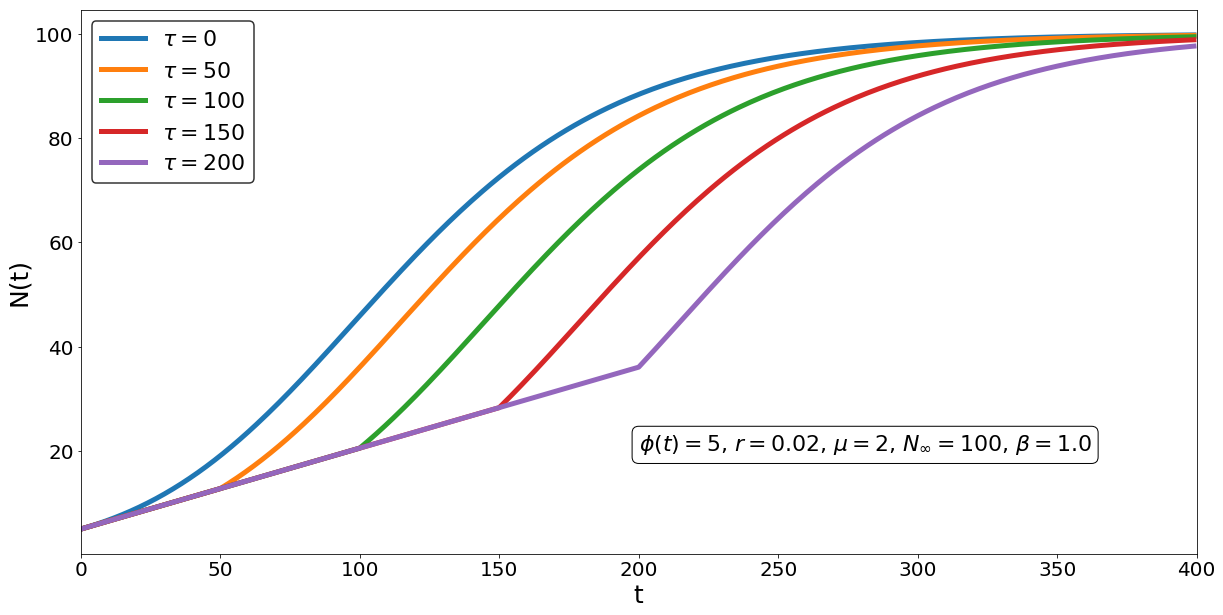

In [5]:
plt.figure(figsize=(20,10))

plt.plot(t, yOla1, label=r"$\tau=0$", linewidth=5)
plt.plot(t, yOla2, label=r"$\tau=50$", linewidth=5)
plt.plot(t, yOla3, label=r"$\tau=100$", linewidth=5)
plt.plot(t, yOla4, label=r"$\tau=150$", linewidth=5)
plt.plot(t, yOla5, label=r"$\tau=200$", linewidth=5)

#plt.vlines(x=[0, 50, 100, 150, 200], ymin=0.0, ymax=100, ls='--', linewidth=3)

plt.xlabel('t', fontsize=25)
plt.ylabel('N(t)', fontsize=25)
#plt.title('Casos México, desde el 28/02/2020')

legend = plt.legend(loc='best', frameon=True, fontsize=22)
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_linewidth(1.5)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim([0, 400])
#plt.ylim([0, 100])


plt.text(200, 20, r"$\phi(t)=5$, $r=0.02$, $\mu=2$, $N_{\infty}=100$, $\beta=1.0$", 
    fontsize=22, bbox=dict(boxstyle="round",ec=(0, 0, 0),fc=(1., 1., 1.)))


# plt.savefig('Frac_tauCte_acum.svg')
#FIGURA 1A

Text(40,0.06,'$\\phi(t)=5$, $r=0.02$, $\\mu=2$, $N_{\\infty}=100$, $\\beta=1.0$')

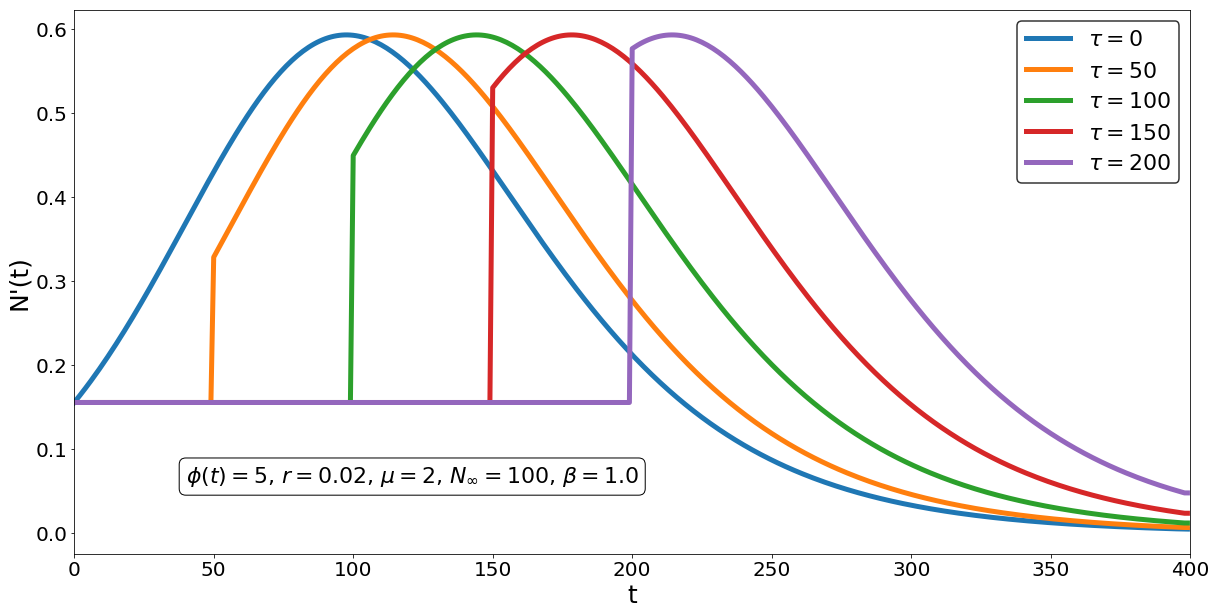

In [6]:
plt.figure(figsize=(20,10))

plt.plot(t, dyOla1, label=r"$\tau=0$", linewidth=5)
plt.plot(t, dyOla2, label=r"$\tau=50$", linewidth=5)
plt.plot(t, dyOla3, label=r"$\tau=100$", linewidth=5)
plt.plot(t, dyOla4, label=r"$\tau=150$", linewidth=5)
plt.plot(t, dyOla5, label=r"$\tau=200$", linewidth=5)

#plt.vlines(x=[50, 100, 200, 300], ymin=0.0, ymax=1., ls='--', linewidth=3)

plt.xlabel('t', fontsize=25)
plt.ylabel("N'(t)", fontsize=25)
#plt.title('Casos México, desde el 28/02/2020')

legend = plt.legend(loc='best', frameon=True, fontsize=22)
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_linewidth(1.5)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim([0, 400])
#plt.ylim([0, 100])


plt.text(40, 0.06, r"$\phi(t)=5$, $r=0.02$, $\mu=2$, $N_{\infty}=100$, $\beta=1.0$", 
         fontsize=22, bbox=dict(boxstyle="round",ec=(0, 0, 0),fc=(1., 1., 1.)))

# plt.savefig('Frac_tauCte_dens.svg')
#FIGURA 1B

# Efecto de $\beta$

In [7]:
p = 1
t = [i/p for i in range(1000*p)]

#(t, tau1, y01, yp01, beta1, r1, mu1, yl1)
yOla1 = IntVolterraOla2(t, 50, 5, 0, 1.0, 0.02, 2, 100)
yOla2 = IntVolterraOla2(t, 50, 5, 0, 0.8, 0.02, 2, 100)
yOla3 = IntVolterraOla2(t, 50, 5, 0, 0.6, 0.02, 2, 100)
yOla4 = IntVolterraOla2(t, 50, 5, 0, 0.4, 0.02, 2, 100)
yOla5 = IntVolterraOla2(t, 50, 5, 0, 0.2, 0.02, 2, 100)

In [8]:
dyOla1 = derivada(t, yOla1)
dyOla2 = derivada(t, yOla2)
dyOla3 = derivada(t, yOla3)
dyOla4 = derivada(t, yOla4)
dyOla5 = derivada(t, yOla5)

Text(5,90,'$\\phi(t)=50$, $r=0.02$, $\\mu=2$, $N_{\\infty}=100$, $\\tau=50$')

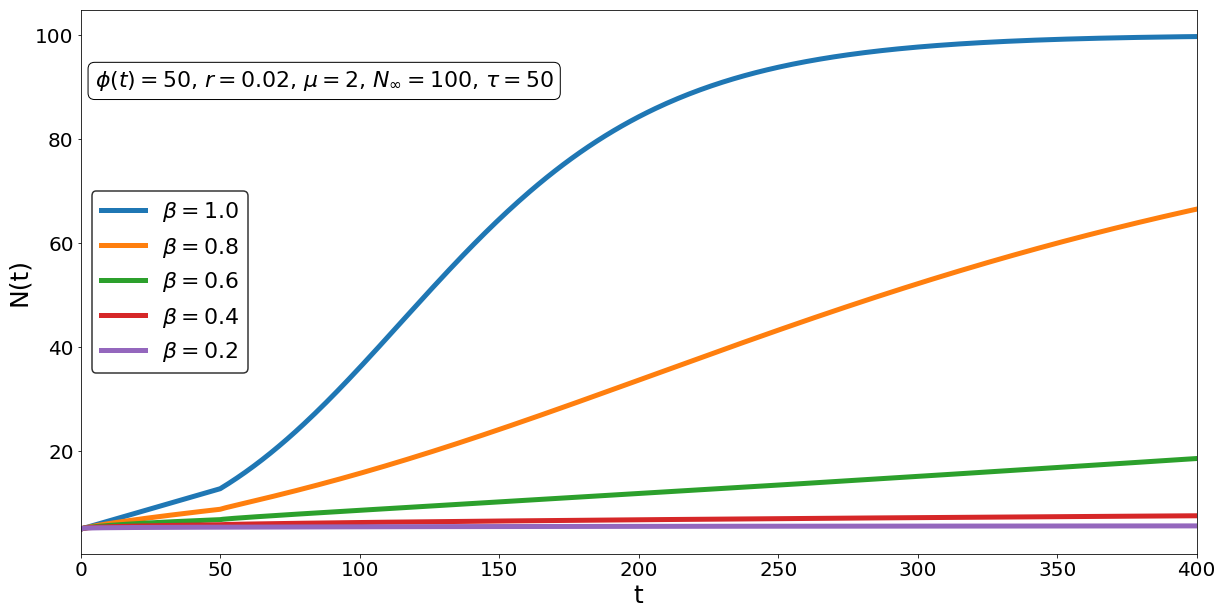

In [9]:
plt.figure(figsize=(20,10))

plt.plot(t, yOla1, label=r"$\beta=1.0$", linewidth=5)
plt.plot(t, yOla2, label=r"$\beta=0.8$", linewidth=5)
plt.plot(t, yOla3, label=r"$\beta=0.6$", linewidth=5)
plt.plot(t, yOla4, label=r"$\beta=0.4$", linewidth=5)
plt.plot(t, yOla5, label=r"$\beta=0.2$", linewidth=5)

#plt.vlines(x=[0, 50, 100, 150, 200], ymin=0.0, ymax=100, ls='--', linewidth=3)

plt.xlabel('t', fontsize=25)
plt.ylabel('N(t)', fontsize=25)
#plt.title('Casos México, desde el 28/02/2020')

legend = plt.legend(loc='center left', frameon=True, fontsize=22)
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_linewidth(1.5)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim([0, 400])
#plt.ylim([0, 100])


plt.text(5, 90, r"$\phi(t)=50$, $r=0.02$, $\mu=2$, $N_{\infty}=100$, $\tau=50$", 
    fontsize=22, bbox=dict(boxstyle="round",ec=(0, 0, 0),fc=(1., 1., 1.)))

# plt.savefig('Frac_betaCte_acum.svg')
#FIGURA 2A

Text(225,0.55,'$\\phi(t)=50$, $r=0.02$, $\\mu=2$, $N_{\\infty}=100$, $\\tau=50$')

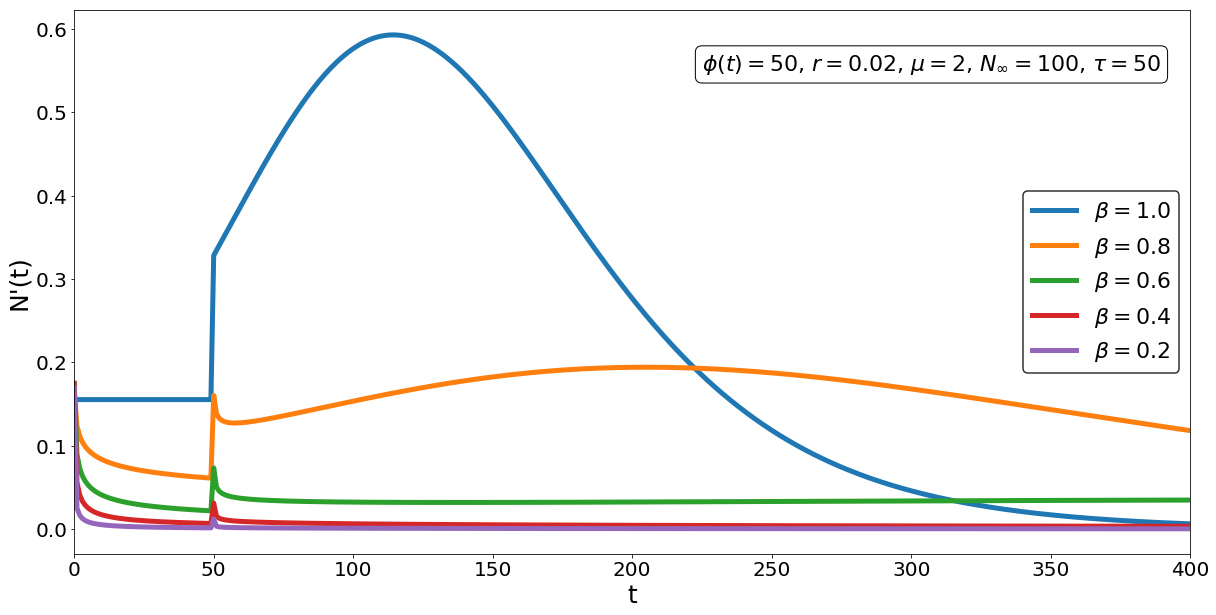

In [10]:
plt.figure(figsize=(20,10))

plt.plot(t, dyOla1, label=r"$\beta=1.0$", linewidth=5)
plt.plot(t, dyOla2, label=r"$\beta=0.8$", linewidth=5)
plt.plot(t, dyOla3, label=r"$\beta=0.6$", linewidth=5)
plt.plot(t, dyOla4, label=r"$\beta=0.4$", linewidth=5)
plt.plot(t, dyOla5, label=r"$\beta=0.2$", linewidth=5)

#plt.vlines(x=[50, 100, 200, 300], ymin=0.0, ymax=1., ls='--', linewidth=3)

plt.xlabel('t', fontsize=25)
plt.ylabel("N'(t)", fontsize=25)
#plt.title('Casos México, desde el 28/02/2020')

legend = plt.legend(loc='center right', frameon=True, fontsize=22)
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_linewidth(1.5)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim([0, 400])
#plt.ylim([0, 100])


plt.text(225, 0.55, r"$\phi(t)=50$, $r=0.02$, $\mu=2$, $N_{\infty}=100$, $\tau=50$", 
         fontsize=22, bbox=dict(boxstyle="round",ec=(0, 0, 0),fc=(1., 1., 1.)))

# plt.savefig('Frac_betaCte_dens.svg')
#FIGURA 2B